In [132]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Data Overview


In [133]:
import pandas as pd
path = 'loan.csv'
df=pd.read_csv(path)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [134]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [135]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [137]:
#  I focus into 2 scenarios: Fully paid and Charged-off
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data cleaning

## Drop data

### Drop Current Rows in loan_status columns
>  I forcus in 2 main scenarios: CHARGED OFF and FUllY PAID 

In [138]:
# drop Current Status
df =df[(df['loan_status']!='Current')]

### Drop null values

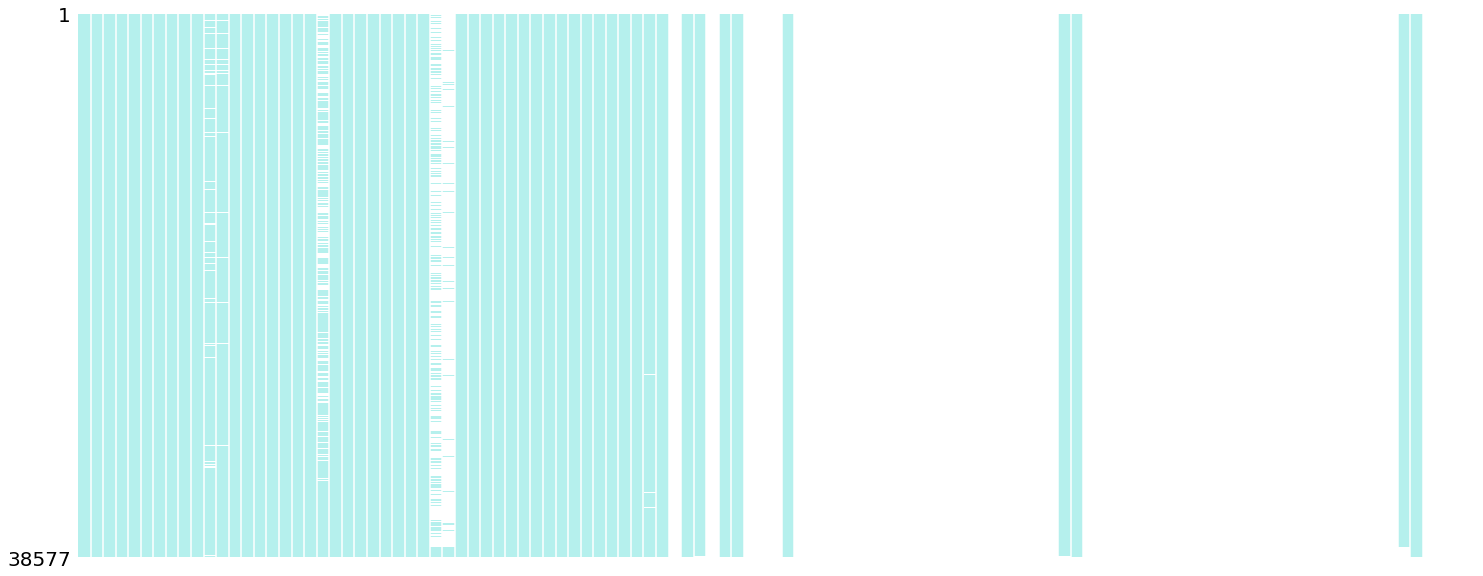

In [139]:
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

In [140]:
# check null ratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')


number of columns with null values per total columns: 68/111


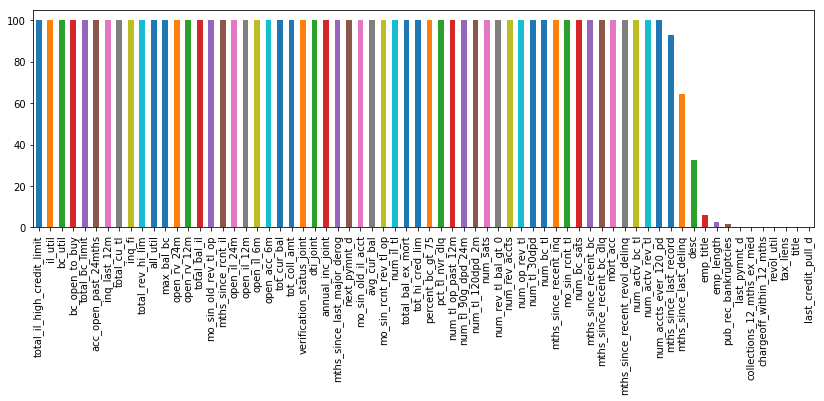

In [141]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [142]:
null_colummns_90 = r_null[r_null > 90].sort_values(ascending = False)
print('number of columns with 90% null values:',len(null_colummns))
null_colummns_90

number of columns with 90% null values: 68


total_il_high_credit_limit        100.000000
total_bc_limit                    100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_amt                      100.000000
verificati

In [143]:
list(null_colummns_90.index)

['total_il_high_credit_limit',
 'total_bc_limit',
 'bc_open_to_buy',
 'avg_cur_bal',
 'acc_open_past_24mths',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'total_rev_hi_lim',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'il_util',
 'total_bal_il',
 'mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'tot_cur_bal',
 'tot_coll_amt',
 'verification_status_joint',
 'dti_joint',
 'annual_inc_joint',
 'mths_since_last_major_derog',
 'next_pymnt_d',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'num_op_rev_tl',
 'total_bal_ex_mort',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'pct_tl_nvr_dlq',
 'num_tl_op_past_12m',
 'num_tl_90g_dpd_24m',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'num_sats',
 'num_rev_tl_bal_gt_0',
 'num_rev_accts',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'num_bc_tl',
 'num_bc_sats',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_inq',
 'mths_s

In [144]:
df = df.drop(columns=list(null_colummns_90.index))
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### drop columns with only one values

In [145]:
columns  = list(df.columns)
columns_vales_count = {c : len(df[c].value_counts().index) for c in columns}
columns_vales_count

{'id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'dti': 2853,
 'delinq_2yrs': 11,
 'earliest_cr_line': 524,
 'inq_last_6mths': 9,
 'mths_since_last_delinq': 95,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'recoveries': 4040,
 'collection_recovery_fee': 2616,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 34418,
 'last_credit_pull_d': 106,
 'collections_12_m

In [146]:
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [147]:
df = df.drop(columns=one_value_column)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0


### Drop unessecery columns:
1. id columns
2. columns with description meaning
3. columns which cannot be used for calculation
4. The columns have similar meanings

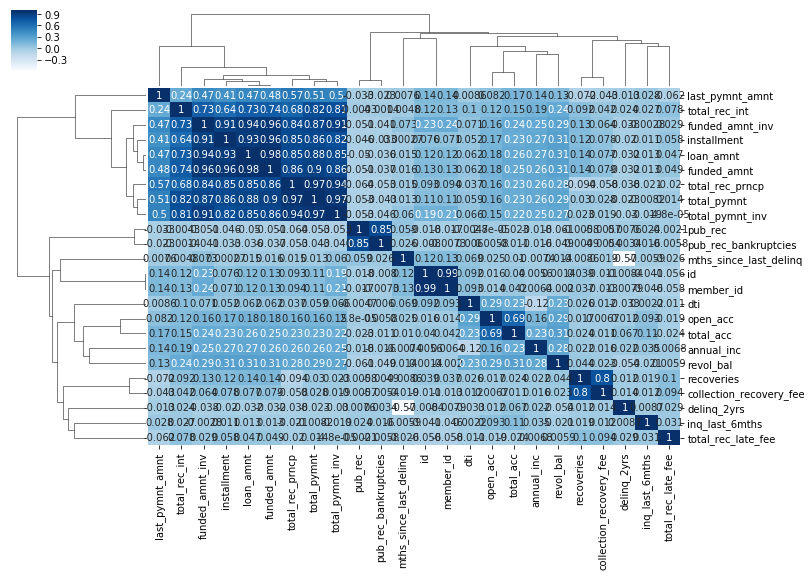

In [148]:
# base on Correlation Matrix to find similar-meaning-column-group
corr = df.corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [149]:

unnessesary_columns = ['url','member_id','id','emp_title','funded_amnt_inv','desc', 'title','sub_grade',
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
    'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d', 'addr_state' ]

In [150]:
df = df.drop(columns=unnessesary_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
term                      38577 non-null object
int_rate                  38577 non-null object
installment               38577 non-null float64
grade                     38577 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
dti                       38577 non-null float64
mths_since_last_delinq    13672 non-null float64
revol_util                38527 non-null object
total_pymnt               38577 non-null float64
pub_rec_bankruptcies    

##  Transform columns

In [151]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [152]:
df['term'] = list(map(lambda x: int(x[:3]), df['term']))
df['term'].value_counts()


36    29096
60     9481
Name: term, dtype: int64

In [153]:
df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
10.65%    403
12.42%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
         ... 
16.33%      2
14.07%      2
15.07%      2
14.88%      2
15.83%      2
14.62%      2
14.25%      2
21.82%      2
17.15%      2
15.38%      2
14.70%      2
20.20%      2
17.90%      2
22.64%      1
22.94%      1
18.72%      1
17.34%      1
14.67%      1
16.96%      1
21.48%      1
17.46%      1
18.36%      1
20.52%      1
16.71%      1
17.44%      1
24.40%      1
16.20%      1
17.54%      1
16.01%      1
16.15%      1
Name: int_rate, Length: 370, dtype: int64

In [154]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
        ... 
15.83      2
13.84      2
14.62      2
17.15      2
14.07      2
14.88      2
15.38      2
15.01      2
14.25      2
14.70      2
17.03      2
15.07      2
20.20      2
16.20      1
17.54      1
16.96      1
17.44      1
16.15      1
14.67      1
22.94      1
24.40      1
18.36      1
17.34      1
16.01      1
18.72      1
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [155]:
list(df['revol_util'].value_counts().index)


['0%',
 '0.20%',
 '63%',
 '31.20%',
 '40.70%',
 '61%',
 '70.40%',
 '66.70%',
 '57.40%',
 '0.10%',
 '46.40%',
 '37.60%',
 '66.60%',
 '64.80%',
 '75.50%',
 '32%',
 '46.60%',
 '64.60%',
 '35.30%',
 '34.40%',
 '70.80%',
 '65.90%',
 '48.90%',
 '68.70%',
 '25.50%',
 '49.80%',
 '89.50%',
 '45.60%',
 '51.10%',
 '33.70%',
 '48%',
 '47.80%',
 '48.20%',
 '72.10%',
 '36.50%',
 '41%',
 '51.60%',
 '76.60%',
 '27.20%',
 '88%',
 '89.90%',
 '49.10%',
 '41.60%',
 '78.70%',
 '55.80%',
 '54.30%',
 '68.60%',
 '74.90%',
 '52.30%',
 '73.20%',
 '55.50%',
 '54.60%',
 '53.90%',
 '62.80%',
 '29.10%',
 '62%',
 '57.20%',
 '33.30%',
 '64.30%',
 '49.60%',
 '7.20%',
 '52.40%',
 '58.70%',
 '45.90%',
 '55.20%',
 '55.40%',
 '41.40%',
 '40.20%',
 '55.10%',
 '23%',
 '30.90%',
 '53.70%',
 '57.70%',
 '79.50%',
 '21.50%',
 '43.40%',
 '60.20%',
 '26.70%',
 '74.40%',
 '57.90%',
 '56.70%',
 '44.70%',
 '44.10%',
 '59.60%',
 '23.80%',
 '70.30%',
 '55.70%',
 '70.10%',
 '1%',
 '47.40%',
 '48.70%',
 '76%',
 '57.80%',
 '66.90%',
 '54

In [156]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df['revol_util'].value_counts()

0.00     954
63.00     62
0.20      62
40.70     57
31.20     57
66.70     56
61.00     56
70.40     56
37.60     55
66.60     55
46.40     55
0.10      55
57.40     55
32.00     54
75.50     54
64.80     54
46.60     54
64.60     54
25.50     53
35.30     53
70.80     53
68.70     53
49.80     53
65.90     53
48.90     53
34.40     53
48.20     52
51.60     52
51.10     52
47.80     52
        ... 
0.12       1
54.22      1
17.67      1
81.31      1
36.94      1
23.11      1
5.34       1
32.71      1
47.36      1
33.26      1
0.04       1
37.63      1
38.77      1
11.63      1
58.77      1
7.43       1
3.18       1
46.74      1
7.28       1
43.61      1
21.59      1
28.41      1
29.77      1
24.89      1
8.01       1
24.63      1
26.33      1
11.62      1
70.26      1
0.49       1
Name: revol_util, Length: 1088, dtype: int64

In [157]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [158]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [159]:
df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [160]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df= df.drop(columns='issue_d')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
term                      38577 non-null int64
int_rate                  38577 non-null float64
installment               38577 non-null float64
grade                     38577 non-null object
emp_length                37544 non-null float64
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
dti                       38577 non-null float64
mths_since_last_delinq    13672 non-null float64
revol_util                38527 non-null float64
total_pymnt               38577 non-null float64
pub_rec_bankruptcies      37880 non-null float64
issue_y              

## fillna

number of columns with null values per total columns: 4/20


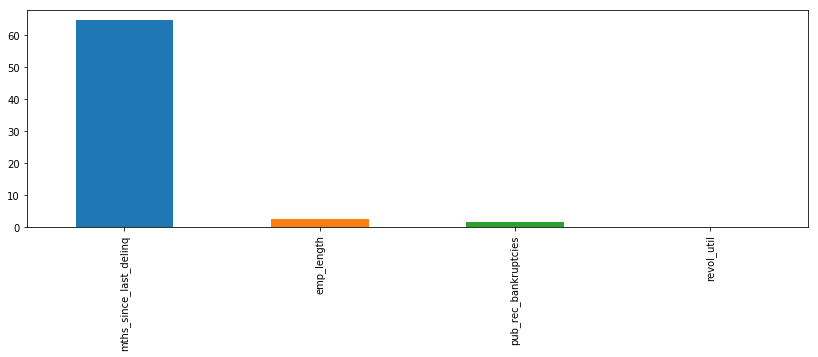

In [162]:
# check NAN columns again
# check nullratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()


In [163]:
null_colummns

mths_since_last_delinq    64.559193
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
revol_util                 0.129611
dtype: float64

In [164]:
# pub_rec_bankruptcies and emp_length have less nan so I decide to drop rows
print('total row before dropping:', df.shape[0])
numrow_before = df.shape[0]
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies','revol_util'])
print('total row after dropping:', df.shape[0])
print('num deleted row:', numrow_before - df.shape[0])

total row before dropping: 38577
total row after dropping: 36800
num deleted row: 1777


In [165]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

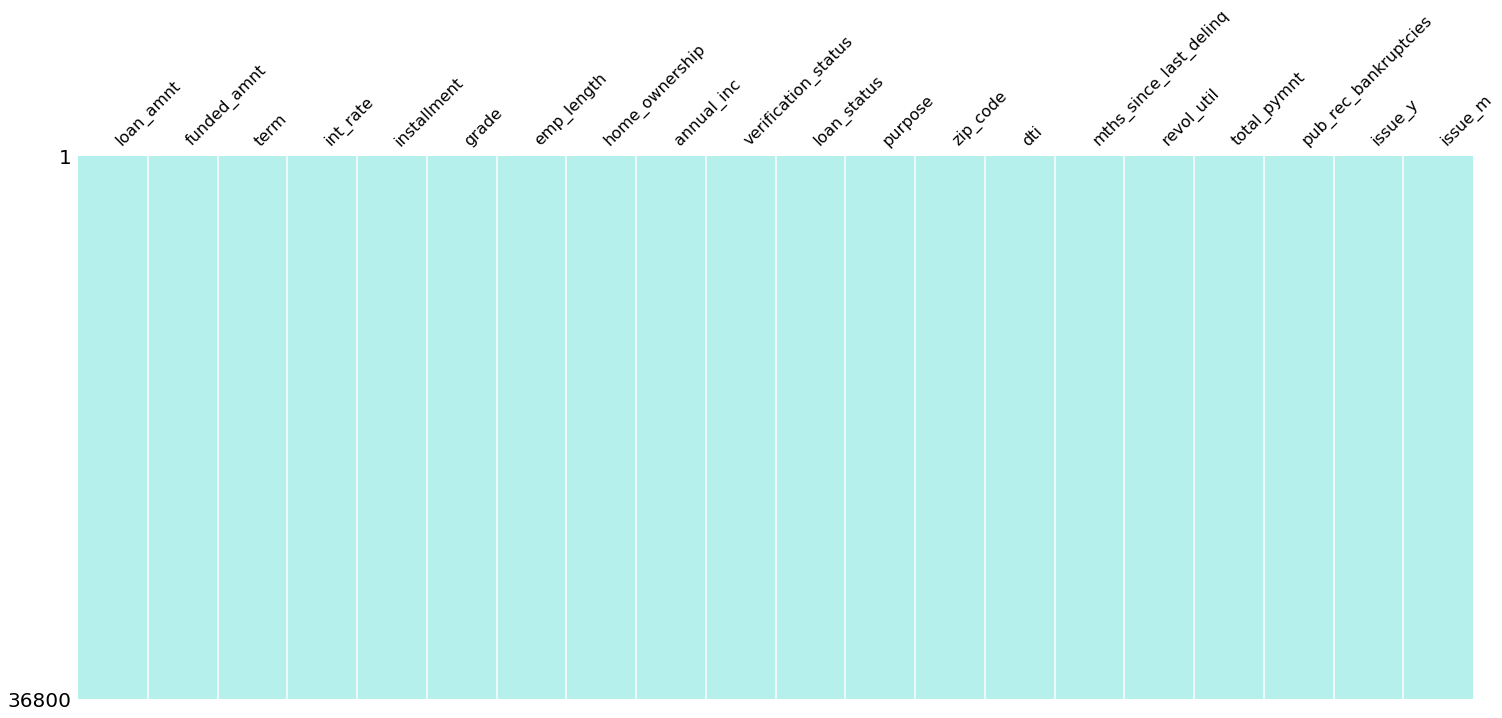

In [166]:
#check missing data again
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

# Univatiate Analysis

## analys to drop outlier

In [167]:
def univariate_analysis1(df, column):
    df1= df[df['loan_status']=='Fully Paid']
    df2 = df[df['loan_status']=='Charged Off']
    _, p = plt.subplots(2,2, figsize=(16, 4))
    sns.distplot(df1.loc[df1[column].notnull(), column], kde=True, hist=True, ax=p[0][0])
    sns.boxplot(x=column, data=df1, ax=p[0][1])
    sns.distplot(df2.loc[df2[column].notnull(), column], kde=True, hist=True, ax=p[1][0])
    sns.boxplot(x=column, data=df2, ax=p[1][1])
    p[0][0].set_xlabel(f'{column}_Fully Paid')
    p[0][1].set_xlabel(f'{column}_Fully Paid')
    p[1][0].set_xlabel(f'{column}_Charged Off')
    p[1][1].set_xlabel(f'{column}_Charged Off')
    plt.tight_layout()
    plt.show()

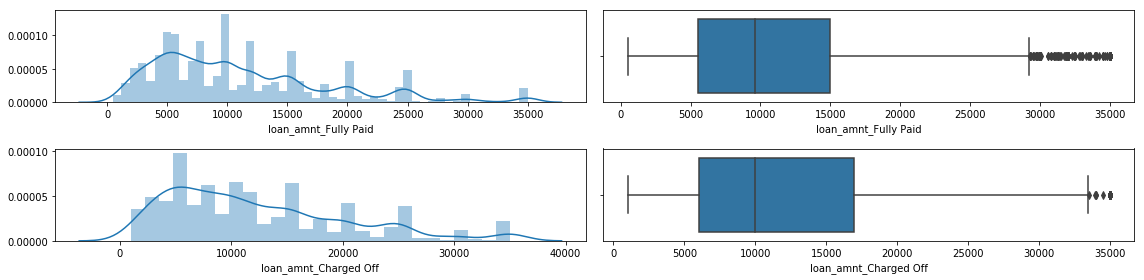

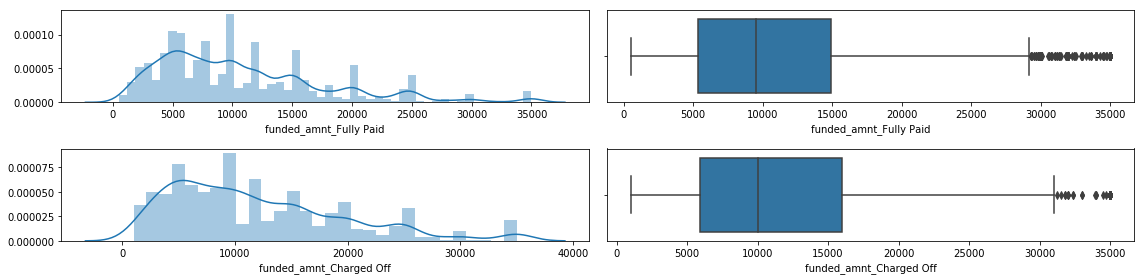

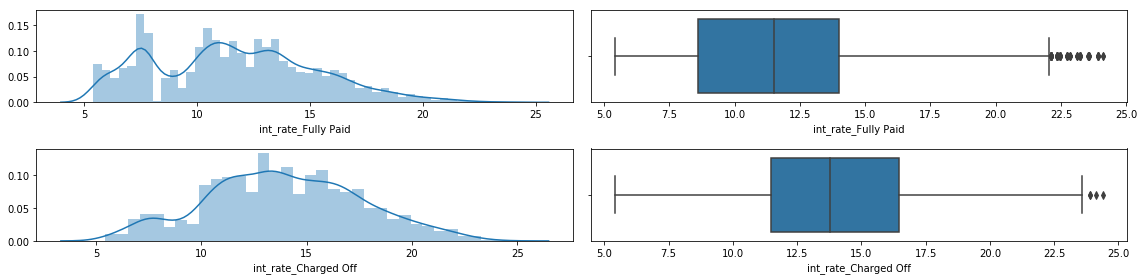

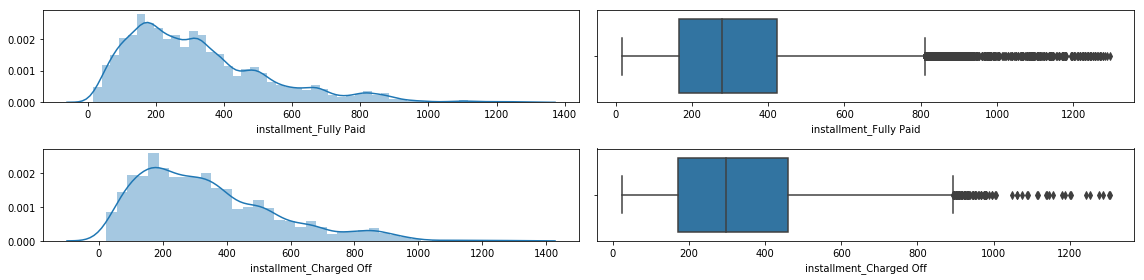

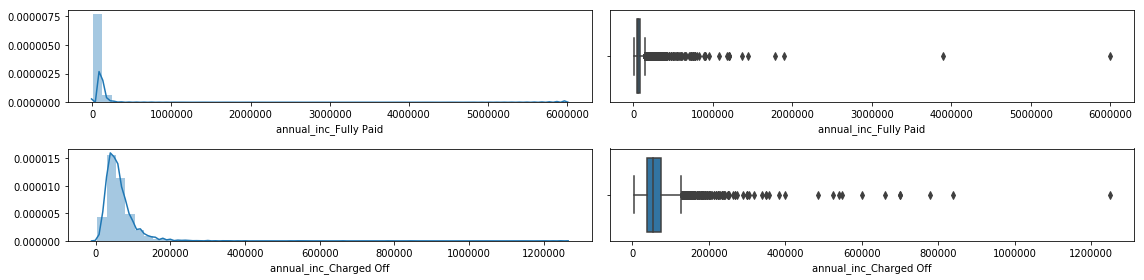

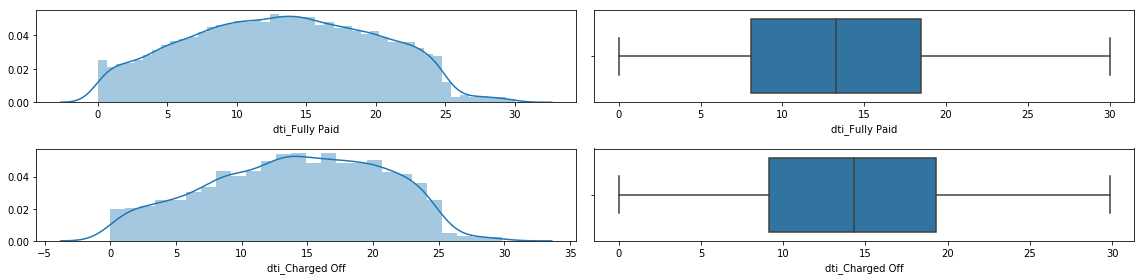

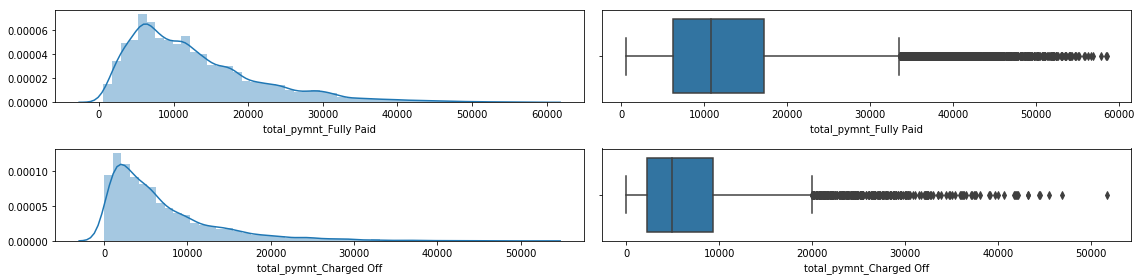

In [168]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    univariate_analysis1(df, c)

In [169]:
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [170]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment', 'annual_inc', 'dti']
for c in ana_boxplot_columns:
    print(f'drop outlier for {c}')
    df= drop_outliner(df,c)

drop outlier for loan_amnt
Percentage of dropped row:  2.93 %
drop outlier for funded_amnt
Percentage of dropped row:  0.08 %
drop outlier for int_rate
Percentage of dropped row:  0.18 %
drop outlier for installment
Percentage of dropped row:  2.92 %
drop outlier for annual_inc
Percentage of dropped row:  4.33 %
drop outlier for dti
Percentage of dropped row:  0.0 %


## plot with value_count

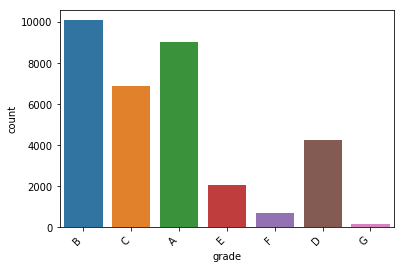

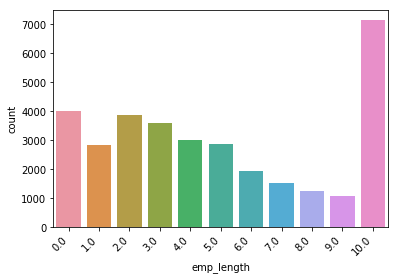

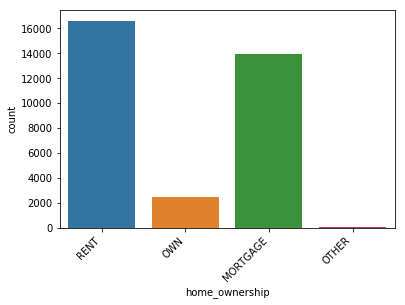

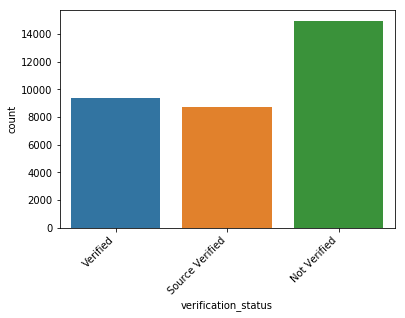

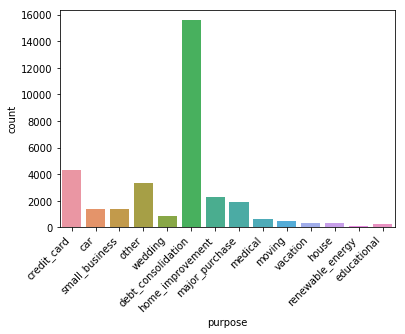

In [171]:
vc_column = ['grade','emp_length', 'home_ownership','verification_status','purpose']
for c in vc_column:
    ax = sns.countplot(data=df, x=c)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

## plot with line 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33090 entries, 0 to 39680
Data columns (total 20 columns):
loan_amnt                 33090 non-null int64
funded_amnt               33090 non-null int64
term                      33090 non-null int64
int_rate                  33090 non-null float64
installment               33090 non-null float64
grade                     33090 non-null object
emp_length                33090 non-null float64
home_ownership            33090 non-null object
annual_inc                33090 non-null float64
verification_status       33090 non-null object
loan_status               33090 non-null object
purpose                   33090 non-null object
zip_code                  33090 non-null object
dti                       33090 non-null float64
mths_since_last_delinq    33090 non-null float64
revol_util                33090 non-null float64
total_pymnt               33090 non-null float64
pub_rec_bankruptcies      33090 non-null float64
issue_y              

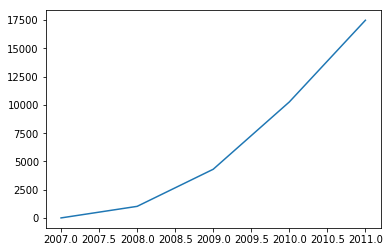

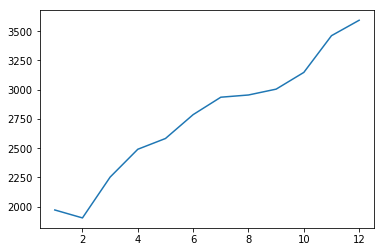

In [173]:
line_column = ['issue_y', 'issue_m']
for c in line_column:
    df[c].value_counts().sort_index().plot.line()
    plt.show()

# Bivatiate Analysis

## compare with loan_status

In [174]:
def boxplot(df,column):
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    sns.set(style="whitegrid")
    _, p = plt.subplots(1,3, figsize=(16, 4))
    ax = sns.countplot(x=column, order=df[column].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
    bx = rw.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
    cx  = rw.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    ax.set_xlabel('ratio per total for detail')
    bx.set_xlabel('ratio per total')
    cx.set_xlabel('charged_off_ratio from each value')
    plt.tight_layout()
    plt.show()

In [175]:
# line track trend charged of by month and year

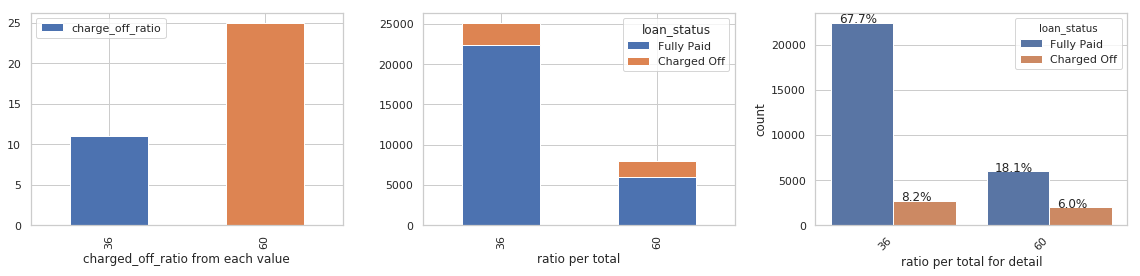

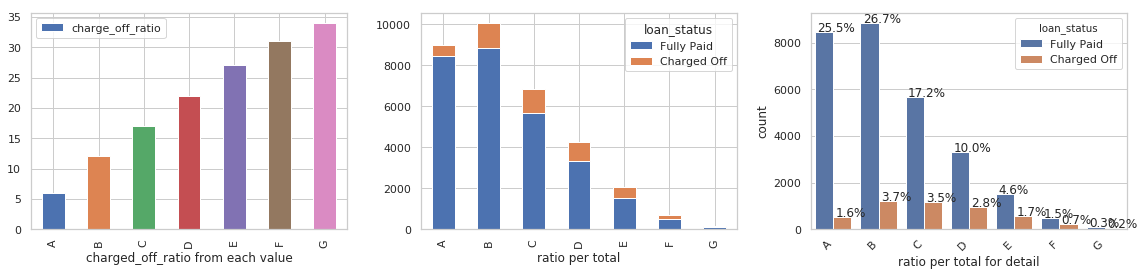

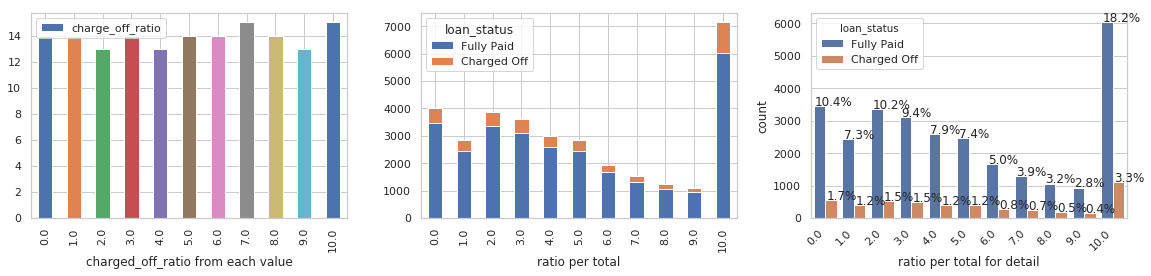

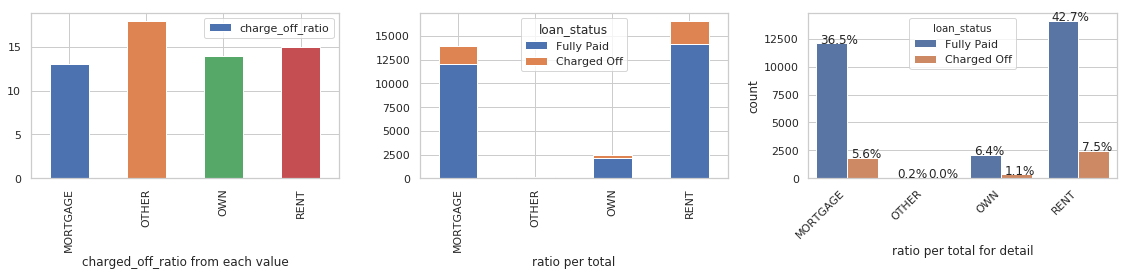

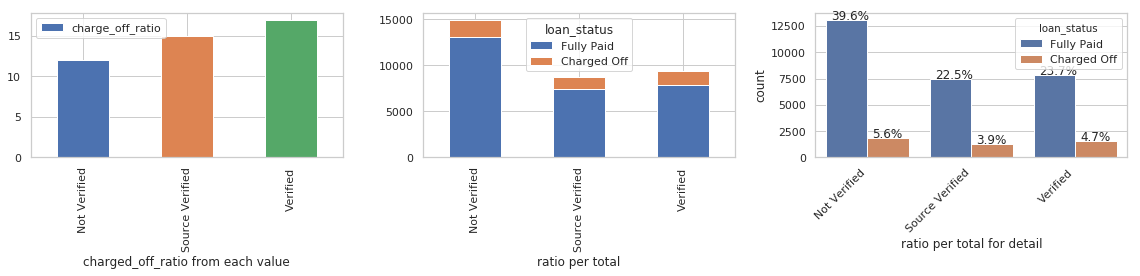

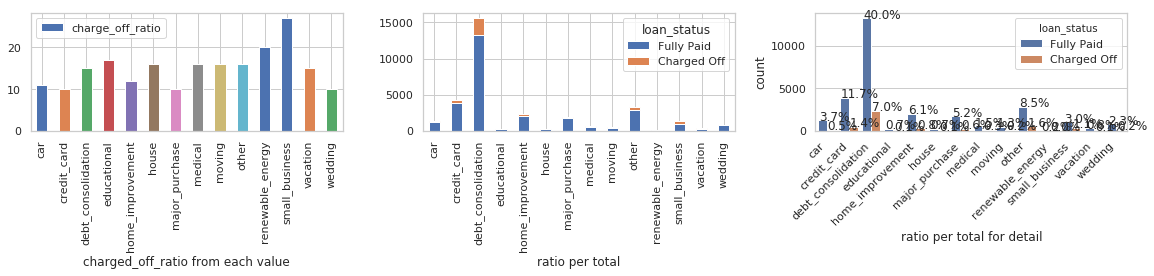

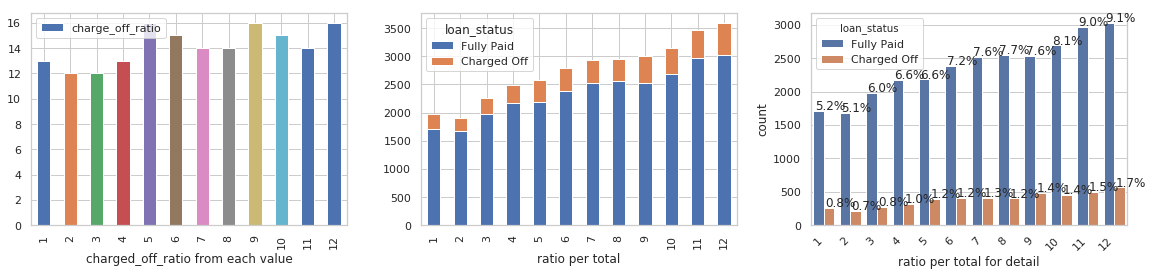

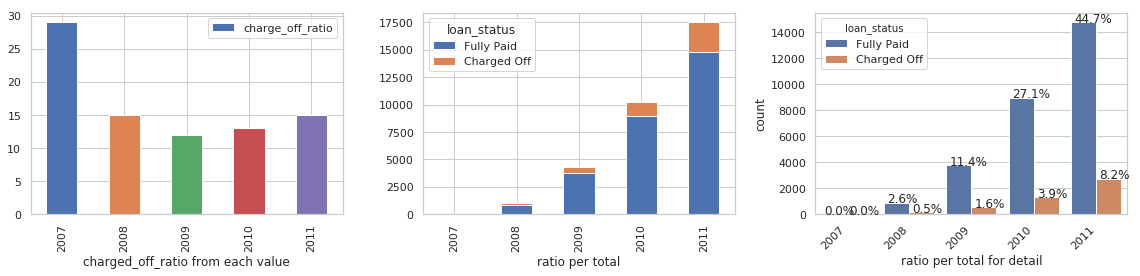

In [176]:
# emp_length is not a useful separable feature as there are all the lengths for each status
countplot_coulumns = ['term','grade','emp_length','home_ownership','verification_status',
                      'purpose','issue_m','issue_y' ]
for c in countplot_coulumns:
    boxplot(df,c)

In [183]:
column = ['emp_length','installment']
rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
rw['total'] = rw['Charged Off'] + rw['Fully Paid']
rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
rw =rw.dropna(subset = ơ)
# sns.set(style="whitegrid")
# _, p = plt.subplots(1,2, figsize=(16, 4))
# bx = rw.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
# cx  = rw.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )

# ax.set_xlabel('ratio per total for detail')
# bx.set_xlabel('ratio per total')
# cx.set_xlabel('charged_off_ratio from each value')
# plt.tight_layout()
# plt.show()

loan_status,emp_length,installment,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,24.96,NaN,1.0,NaN,NaN
1,0.0,30.84,NaN,1.0,NaN,NaN
2,0.0,30.88,NaN,1.0,NaN,NaN
3,0.0,30.94,NaN,1.0,NaN,NaN
4,0.0,31.01,NaN,3.0,NaN,NaN
5,0.0,31.05,NaN,1.0,NaN,NaN
6,0.0,31.06,NaN,2.0,NaN,NaN
7,0.0,31.12,NaN,1.0,NaN,NaN
8,0.0,31.20,NaN,2.0,NaN,NaN
9,0.0,31.62,1.0,2.0,3.0,33.0


In [ ]:
a= a

## top 7 zip_code

In [ ]:
value_counts= df['zip_code'].value_counts(ascending= True)
value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
value_counts_df

sns.distplot(value_counts_df.loc[value_counts_df['Count'].notnull(), 'Count'], kde=True, hist=True)
plt.show()

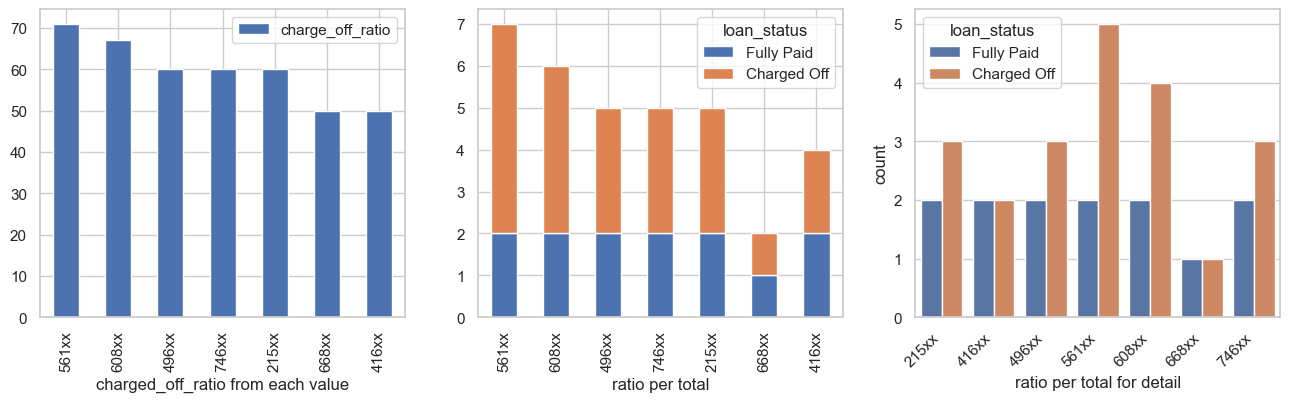

In [ ]:
column = 'zip_code'
rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
rw['total'] = rw['Charged Off'] + rw['Fully Paid']
rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
rw_sorted = rw.sort_values(by='charge_off_ratio', ascending=False)
top_zip_codes  =  rw_sorted.head(7)
sns.set(style="whitegrid")
_, p = plt.subplots(1,3, figsize=(16, 4))

ax = sns.countplot(x=column, order=top_zip_codes['zip_code'].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
bx = top_zip_codes.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
cx  = top_zip_codes.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
# Annotate the bars with count values
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('ratio per total for detail')
bx.set_xlabel('ratio per total')
cx.set_xlabel('charged_off_ratio from each value')
plt.show()

In [ ]:
rw

loan_status,zip_code,Charged Off,Fully Paid,total,charge_off_ratio
0,010xx,13.0,74.0,87.0,15.0
1,011xx,1.0,13.0,14.0,7.0
2,012xx,1.0,9.0,10.0,10.0
3,013xx,3.0,8.0,11.0,27.0
4,014xx,6.0,24.0,30.0,20.0
...,...,...,...,...,...
796,995xx,4.0,24.0,28.0,14.0
797,996xx,2.0,7.0,9.0,22.0
798,997xx,5.0,10.0,15.0,33.0
799,998xx,NaN,10.0,NaN,NaN


In [ ]:
## Zipcode and grade and purpuse

## Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33135 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               33135 non-null  int64  
 1   funded_amnt             33135 non-null  int64  
 2   term                    33135 non-null  int64  
 3   int_rate                33135 non-null  float64
 4   installment             33135 non-null  float64
 5   grade                   33135 non-null  object 
 6   emp_length              33135 non-null  float64
 7   home_ownership          33135 non-null  object 
 8   annual_inc              33135 non-null  float64
 9   verification_status     33135 non-null  object 
 10  loan_status             33135 non-null  object 
 11  purpose                 33135 non-null  object 
 12  zip_code                33135 non-null  object 
 13  dti                     33135 non-null  float64
 14  mths_since_last_delinq  33135 non-null

In [ ]:
corr_columns= ['loan_amnt','funded_amnt','funded_amnt_inv', 'int_rate','installment','emp_length','annual_inc','dti', 'mths_since_last_delinq','pub_rec_bankruptcies']
corr = df[corr_columns].corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

KeyError: "['funded_amnt_inv'] not in index"